# Sentiment Analysis + Linear Regression 

Quickly develop a linear regression based on review text using the SentimentAnalysis model built into TextBlob. To improve this model I would train a model specifically using Spacy.

In [1]:
import pandas as pd
raw_df = pd.read_csv('Womens Clothing E-Commerce Reviews.csv', delimiter=',')

In [2]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(raw_df, test_size=0.2, random_state=42)

In [3]:
train.head(20)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
21331,21331,1092,31,Versatile,I passed over this dress online thinking i'd n...,5,1,0,General,Dresses,Dresses
8113,8113,406,33,"Such a unique, flattering swimsuit!",I am so excited about this swimsuit. i have ne...,5,1,0,Initmates,Intimate,Swim
23036,23036,1008,31,"The perfect skirt for all year, every year.","To start: i'm 135 lbs, 5'7"", 34c, 28 jeans, si...",5,1,0,General Petite,Bottoms,Skirts
316,316,836,59,Love this blouse,I really like this blouse a lot. very very eas...,5,1,0,General,Tops,Blouses
6781,6781,1030,39,So crazy comfortable,I haven't worn jeans in a year because i felt ...,5,1,0,General,Bottoms,Jeans
10224,10224,147,46,NaN,NaN,5,1,0,Initmates,Intimate,Sleep
13108,13108,1037,47,Fit issues!,So these look so good online - i love flare an...,2,0,0,General,Bottoms,Jeans
9623,9623,862,47,"Nicer than a tee, lighter than a sweater",The lightweight knit and flattering colors mad...,5,1,5,General Petite,Tops,Knits
8504,8504,861,54,NaN,I'm a petite so as usual i have to order from ...,1,0,0,General,Tops,Knits
11293,11293,829,32,Perfect fall tunic!,This tunic is perfection! this tunic will be p...,5,1,4,General,Tops,Blouses


In [4]:
from textblob import TextBlob

def sentiment(text):
    if not text or pd.isna(text):
        return  {"polarity": 0.0, "subjectivity": 0.0}
    doc = TextBlob(text)
    return {"polarity": doc.sentiment.polarity, "subjectivity": doc.sentiment.subjectivity}

<AxesSubplot:ylabel='Frequency'>

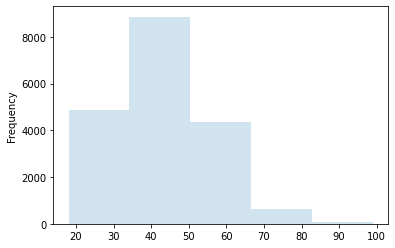

In [5]:
train["Age"].plot.hist(bins=5, alpha=0.2)

<AxesSubplot:ylabel='Frequency'>

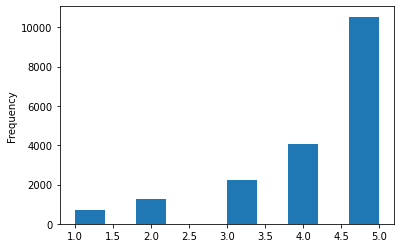

In [9]:
train["Rating"].plot.hist()

<AxesSubplot:xlabel='Age', ylabel='Rating'>

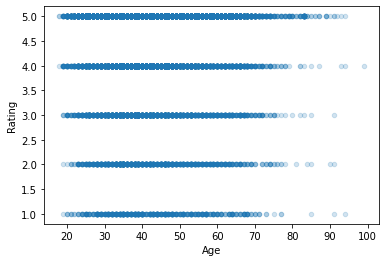

In [10]:
train.plot(kind="scatter", x="Age", y="Rating", alpha=0.2)

In [11]:
train.corr()["Rating"].sort_values(ascending=False)

Rating                     1.000000
Recommended IND            0.793989
Age                        0.027973
Unnamed: 0                -0.009647
Clothing ID               -0.013731
Positive Feedback Count   -0.062996
Name: Rating, dtype: float64

In [12]:
def bin_feature(df, column, bins, labels):
    return pd.cut(df[column], bins=bins, labels=labels)

In [26]:
def transform(df):
    df = df.copy()
    bins = [0, 20, 35, 60, 150]
    labels = [1,2,3,4]
    df["age_binned"] = bin_feature(df=df, column="Age", bins=bins, labels=labels)
    df = df.merge(df["Review Text"].apply(lambda s: pd.Series(sentiment(s))), left_index=True, right_index=True)
    return df[["age_binned", "polarity", "subjectivity"]], df["Rating"]

X_train, y_train = transform(train)
X_test, y_test = transform(test)

In [27]:
X_train.shape

(18788, 3)

In [28]:
y_train.shape

(18788,)

In [29]:
X_test.shape

(4698, 3)

In [30]:
y_test.shape

(4698,)

In [31]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train.values, y_train.values)

LinearRegression()

In [32]:
some_features = X_train.iloc[:5]
some_labels = y_train.iloc[:5]
lin_reg.predict(some_features)

array([4.33755844, 4.9270323 , 4.27284182, 4.43059911, 3.39567818])

In [33]:
some_labels

21331    5
8113     5
23036    5
316      5
6781     5
Name: Rating, dtype: int64

In [34]:
from sklearn.metrics import mean_squared_error

def evaluate(model, x, y_true):
    y_pred = lin_reg.predict(x)
    return mean_squared_error(y_true, y_pred)

print("Train RMSE", evaluate(lin_reg, X_train, y_train))
print("Test RMSE", evaluate(lin_reg, X_test, y_test))

Train RMSE 1.055103295101889
Test RMSE 1.0499987993457605
